In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import re
import glob

from matplotlib import pyplot as plt
from rolestereotype import RoleStereotype as rs

warnings.filterwarnings('ignore')
import seaborn as sns

sns.set()
sns.set_style(style='white')
%matplotlib inline

In [2]:
# create the list of selected projects 

path  = '../../data/SourceProjects/Desktop/'
projects = [projects for projects in os.listdir(path) if not projects.startswith('.')]
projects

['ipscan-3.7.3',
 'LiveChatServer-4.1',
 'JetUML-3.1',
 'ganttproject-2.8.11',
 'GoGreen-0.1.3',
 'LogFX-0.9.1',
 'pgptool-0.5.9.2',
 'argouml-0.35.1',
 'keystore-explorer-5.4.4',
 'SweetHome3D-5.6',
 'jEdit-5.5.0',
 'mars-sim-3.1.0',
 'checkstyle-8.39',
 'freemind-1.0.0',
 'jpass-0.1.20']

In [3]:
rstr = [str(r) for r in rs]

In [4]:
# describe
datasets = dict()

for prj in projects:
    # role stereotype classification results
    files_rs = glob.glob(f"../../data/RoleStereotype/Desktop/{prj}/*-features-classified.csv")
    df_rs = pd.read_csv(files_rs[0])
    datasets[prj] = df_rs

In [5]:
desktop_rs_df = pd.DataFrame()
for prj,df in datasets.items():
  df['project'] = [prj] * df.shape[0]
  desktop_rs_df = desktop_rs_df.append(df)

desktop_rs_df.drop(columns=['index', 'classname', 'Unnamed: 0'], inplace=True)
project = list(desktop_rs_df['project'])
desktop_rs_df.drop(columns=['project'], inplace=True)
desktop_rs_df.insert(1, 'Project', project) 
desktop_rs_df.head()

,Fullpathname,Project,Classname,loc,numAttr,numMethod,setters,getters,isPersist,isCollection,...,isInterface,isInnerClass,isClass,isEnum,classPublicity,numPublicMethods,numPrivateMethods,numProtectedMethods,isAbstract,label
0,ipscan-v3.7.3/src/net/azib/ipscan/Main.java,ipscan-3.7.3,Main,129,1,6,0,0,False,False,...,False,False,True,False,public,0,0,0,False,Service Provider
1,ipscan-v3.7.3/src/net/azib/ipscan/config/Comma...,ipscan-3.7.3,CommandLineProcessor,173,11,8,0,0,False,False,...,False,False,True,False,public,0,0,0,False,Service Provider
2,ipscan-v3.7.3/src/net/azib/ipscan/config/Comma...,ipscan-3.7.3,CommandProcessor,17,0,0,0,0,False,False,...,True,False,False,False,public,0,0,0,False,Service Provider
3,ipscan-v3.7.3/src/net/azib/ipscan/config/Comme...,ipscan-3.7.3,CommentsConfig,66,1,4,1,3,False,False,...,False,False,True,False,public,0,0,0,False,Service Provider
4,ipscan-v3.7.3/src/net/azib/ipscan/config/Compo...,ipscan-3.7.3,ComponentRegistry,59,0,2,0,0,False,False,...,False,False,True,False,public,0,0,0,False,Service Provider


In [6]:
#desktop_rs_df.to_csv('../../results/csv/desktop_rs.csv')

In [7]:
desktop_rs_df.shape

(6640, 29)

In [9]:
desktop_rs_df.head()

,Fullpathname,Project,Classname,loc,numAttr,numMethod,setters,getters,isPersist,isCollection,...,isInterface,isInnerClass,isClass,isEnum,classPublicity,numPublicMethods,numPrivateMethods,numProtectedMethods,isAbstract,label
0,ipscan-v3.7.3/src/net/azib/ipscan/Main.java,ipscan-3.7.3,Main,129,1,6,0,0,False,False,...,False,False,True,False,public,0,0,0,False,Service Provider
1,ipscan-v3.7.3/src/net/azib/ipscan/config/Comma...,ipscan-3.7.3,CommandLineProcessor,173,11,8,0,0,False,False,...,False,False,True,False,public,0,0,0,False,Service Provider
2,ipscan-v3.7.3/src/net/azib/ipscan/config/Comma...,ipscan-3.7.3,CommandProcessor,17,0,0,0,0,False,False,...,True,False,False,False,public,0,0,0,False,Service Provider
3,ipscan-v3.7.3/src/net/azib/ipscan/config/Comme...,ipscan-3.7.3,CommentsConfig,66,1,4,1,3,False,False,...,False,False,True,False,public,0,0,0,False,Service Provider
4,ipscan-v3.7.3/src/net/azib/ipscan/config/Compo...,ipscan-3.7.3,ComponentRegistry,59,0,2,0,0,False,False,...,False,False,True,False,public,0,0,0,False,Service Provider


In [19]:
# number of classes per project
desktop_rs_df.groupby('Project')[['Fullpathname']].count().sort_values(by='Fullpathname', ascending=False)

,Fullpathname
Project,
argouml-0.35.1,1236
mars-sim-3.1.0,1109
checkstyle-8.39,1008
ganttproject-2.8.11,671
jEdit-5.5.0,577
SweetHome3D-5.6,546
keystore-explorer-5.4.4,400
freemind-1.0.0,370
pgptool-0.5.9.2,226


In [22]:
# total no. of classes
total_Classes = desktop_rs_df.groupby('Project')[['Fullpathname']].count().sort_values(by='Fullpathname', ascending=False)
total_Classes['Fullpathname'].sum()

6640

In [20]:
# line of codes per project 
desktop_rs_df.groupby('Project')[['Fullpathname', 'loc']].sum().sort_values(by='loc', ascending=False)

,loc
Project,
mars-sim-3.1.0,367715
argouml-0.35.1,232386
jEdit-5.5.0,186795
checkstyle-8.39,142168
SweetHome3D-5.6,130688
keystore-explorer-5.4.4,89856
ganttproject-2.8.11,88519
freemind-1.0.0,74420
pgptool-0.5.9.2,28292


In [21]:
total_LOC = desktop_rs_df.groupby('Project')[['Fullpathname', 'loc']].sum().sort_values(by='loc', ascending=False)
total_LOC['loc'].sum()

1397102

In [23]:
merged_dataset = dict()
# join design smell data with rolestereotypes:
desktop_ds_df = pd.read_csv('../../results/csv/desktop_ds.csv')

# generate common identifier
desktop_rs_df['classname2'] = [re.sub(r".*[\\/]|\.java$", '', n).replace(".", "$") for n in desktop_rs_df['Fullpathname']]
desktop_ds_df['classname2'] = [re.sub(r".*\.", '', n) for n in desktop_ds_df['FullClassPath']]


df_merged = pd.merge(desktop_ds_df, desktop_rs_df, on= "classname2", how= "inner")
# datasets[prj] = df_merged

# line = f"{prj:24} ({df_merged.shape[0]:4} classes)"
# ct = df_merged['label'].value_counts(ascending=True, sort=False)
# print(f"{line} {',  '.join([f'{r}:{ct[r] if r in ct.keys() else 0:4}' for r in rstr])}")
df_merged

,Unnamed: 0,FullClassPath,Project_x,SpeculativeGenerality,BaseClassKnowsDerivedClass,MessageChains,LongParameterList,SpaghettiCode,BaseClassShouldBeAbstract,LongMethod,...,isInterface,isInnerClass,isClass,isEnum,classPublicity,numPublicMethods,numPrivateMethods,numProtectedMethods,isAbstract,label
0,0,biz.ganttproject.core.calendar.CalendarEvent,ganttproject-2.8.11,0,0,0,1,0,0,0,...,False,False,True,False,public,0,0,0,False,Information Holder
1,1,biz.ganttproject.core.calendar.GPCalendarBase,ganttproject-2.8.11,0,0,0,1,0,0,0,...,False,False,True,False,default,0,0,0,True,Service Provider
2,2,biz.ganttproject.core.calendar.WeekendCalendar...,ganttproject-2.8.11,0,0,0,0,0,0,1,...,False,False,True,False,public,0,0,0,False,Structurer
3,3,biz.ganttproject.core.chart.canvas.Canvas,ganttproject-2.8.11,0,0,0,0,0,0,1,...,False,False,True,False,public,0,0,0,False,Service Provider
4,4,biz.ganttproject.core.chart.canvas.DummySpatia...,ganttproject-2.8.11,0,0,0,1,0,0,0,...,False,False,True,False,public,0,0,0,False,Service Provider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,2982,src.com.eteks.sweethome3d.viewcontroller.Textu...,SweetHome3Dv5.6,0,0,0,0,0,0,0,...,False,False,True,False,public,12,0,0,False,Controller
2632,2983,src.com.eteks.sweethome3d.viewcontroller.UserP...,SweetHome3Dv5.6,0,0,0,0,0,0,0,...,False,False,True,False,public,52,0,1,False,Coordinator
2633,2984,src.com.eteks.sweethome3d.viewcontroller.Video...,SweetHome3Dv5.6,0,0,0,0,0,0,0,...,False,False,True,False,public,24,2,1,False,Controller
2634,2985,src.com.eteks.sweethome3d.viewcontroller.WallC...,SweetHome3Dv5.6,0,0,0,0,0,0,0,...,False,False,True,False,public,53,7,1,False,Controller


In [24]:
df_merged.drop(columns=['Unnamed: 0'], inplace=True)
df_merged.drop_duplicates(subset=['FullClassPath'], inplace=True)
df_merged.shape

(2465, 50)

In [25]:
#df_merged.to_csv('../../results/csv/desktop_ds_rs.csv')

In [26]:
# line = f"{prj:24} ({df_merged.shape[0]:4} classes)"
ct = df_merged['label'].value_counts()
print(f"{',  '.join([f'{r}:{ct[r] if r in ct.keys() else 0:4}' for r in rstr])}")

Controller:  46,  Coordinator:   5,  Information Holder: 473,  Interfacer: 441,  Service Provider:1461,  Structurer:  39


In [27]:
df_merged.groupby(['Project_x','label'])[['FullClassPath']].count()

FullClassPath
Project_x               label                            
GoGreen-0.1.3           Information Holder             10
                        Service Provider               18
JetUML-3.1              Controller                      1
                        Information Holder             14
                        Interfacer                      7
                        Service Provider               67
LiveChatServer-4.1      Information Holder              5
                        Interfacer                      4
                        Service Provider                6
LogFX-0.9.1             Information Holder              4
                        Interfacer                      4
                        Service Provider               10
SweetHome3Dv5.6         Controller                     29
                        Coordinator                     4
                        Information Holder             21
                        Interfacer                     14
                        Service Provider               16
                        Structurer                      8
argouml-0.35.1          Controller                      2
                        Coordinator                     1
                        Information Holder             80
                        Interfacer                     81
                        Service Provider              358
                        Structurer                      3
checkstyle-8.39         Information Holder             77
                        Service Provider              100
freemind-1.0.0          Controller                      6
                        Information Holder             22
                        Interfacer                     21
                        Service Provider               85
                        Structurer                      5
ganttproject-2.8.11     Controller                      1
                        Information Holder             38
                        Interfacer                     52
                        Service Provider              136
                        Structurer                     11
ipscan-3.7.3            Information Holder              8
                        Interfacer                     12
                        Service Provider               40
                        Structurer                      1
jEdit-5.5.0             Controller                      2
                        Information Holder             70
                        Interfacer                     31
                        Service Provider              260
                        Structurer                      1
jpass-0.1.20            Information Holder              2
                        Interfacer                      2
                        Service Provider                5
keystore-explorer-5.4.4 Information Holder             22
                        Interfacer                     54
                        Service Provider              105
mars-sim-3.1.0          Controller                      5
                        Information Holder             86
                        Interfacer                    136
                        Service Provider              226
                        Structurer                     10
pgptool-0.5.9.2         Information Holder             14
                        Interfacer                     23
                        Service Provider               29

In [28]:
metrics = "AntiSingleton,BaseClassKnowsDerivedClass,BaseClassShouldBeAbstract,Blob,ClassDataShouldBePrivate,ComplexClass,FunctionalDecomposition,LargeClass,LazyClass,LongMethod,LongParameterList,ManyFieldAttributesButNotComplex,MessageChains,RefusedParentBequest,SpaghettiCode,SpeculativeGenerality,SwissArmyKnife,TraditionBreaker".split(",")
len(metrics)

18

In [29]:
metrics_def = {
    "AntiSingleton":"A class that provides mutable class variables, which consequently could be used as global variables.",
    "BaseClassKnowsDerivedClass": "A class that has many subclasses without being abstract.",
    "BaseClassShouldBeAbstract": "A class that has many subclasses without being abstract.",
    "Blob": "A large controller class that depends on data stored in surrounding data classes. A large class declares many fields and methods with a low cohesion.",
    "ClassDataShouldBePrivate": "A class exposing its fields, violating the principle of data hiding.",
    "ComplexClass" : "A class having at least one method having a high cyclomatic complexity.",
    "FunctionalDecomposition": "A main class with a procedural name in which inheritance and polymorphism are scarcely used.",
		"LargeClass": "A class that has grown too large in term of Lines of Code.",
    "LazyClass": "A class having very small dimension, few methods and low complexity.",
		"LongMethod": "A method that is unduly long in terms of lines of code.",
    "LongParameterList": "A method having a long list of parameters, some of which avoidable.",
    "ManyFieldAttributesButNotComplex": "A class that declares many attributes but which is not complex and, hence, more likely to be some kind of data class holding values without providing behaviour.",
    "MessageChains": "A long chain of method invocations performed to implement a class functionality.", 
    "RefusedParentBequest": "A class redefining most of the inherited methods, thus signaling a wrong hierarchy.",
    "SpaghettiCode": "A class implementing complex methods interacting between them, with no parameters, using global variables.",
    "SpeculativeGenerality": "A class declared as abstract having very few children classes using its methods.",
    "SwissArmyKnife": "A complex class that offers a high number of services, for example, a complex class implementing a high number of interfaces.",
    "TraditionBreaker": "A class that inherits from a large parent class but that provides little behaviour and without subclasses."
  }

In [30]:
# sort projects by loc in descending order
prj_order = list(df_merged.groupby(['Project_x']).sum()['loc'].sort_values(ascending=False).keys())
prj_order

['mars-sim-3.1.0',
 'argouml-0.35.1',
 'jEdit-5.5.0',
 'SweetHome3Dv5.6',
 'keystore-explorer-5.4.4',
 'ganttproject-2.8.11',
 'freemind-1.0.0',
 'pgptool-0.5.9.2',
 'JetUML-3.1',
 'checkstyle-8.39',
 'ipscan-3.7.3',
 'LogFX-0.9.1',
 'LiveChatServer-4.1',
 'jpass-0.1.20',
 'GoGreen-0.1.3']

In [31]:
for m in metrics:
    print(f"{m}: {df_merged[m].sum()}")

AntiSingleton: 121
BaseClassKnowsDerivedClass: 0
BaseClassShouldBeAbstract: 135
Blob: 222
ClassDataShouldBePrivate: 157
ComplexClass: 1092
FunctionalDecomposition: 0
LargeClass: 0
LazyClass: 634
LongMethod: 1224
LongParameterList: 630
ManyFieldAttributesButNotComplex: 21
MessageChains: 4
RefusedParentBequest: 235
SpaghettiCode: 64
SpeculativeGenerality: 32
SwissArmyKnife: 9
TraditionBreaker: 0


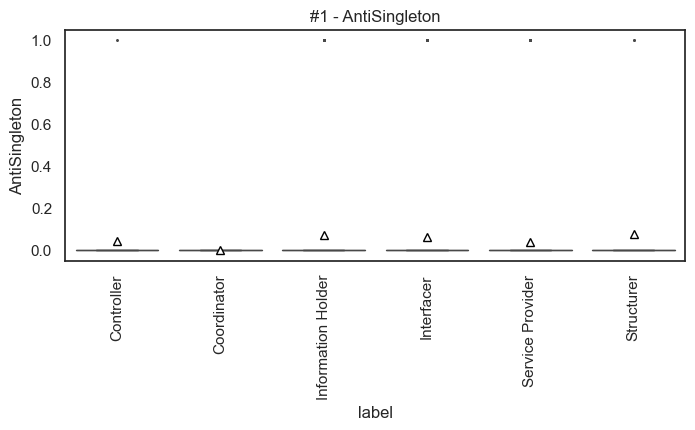

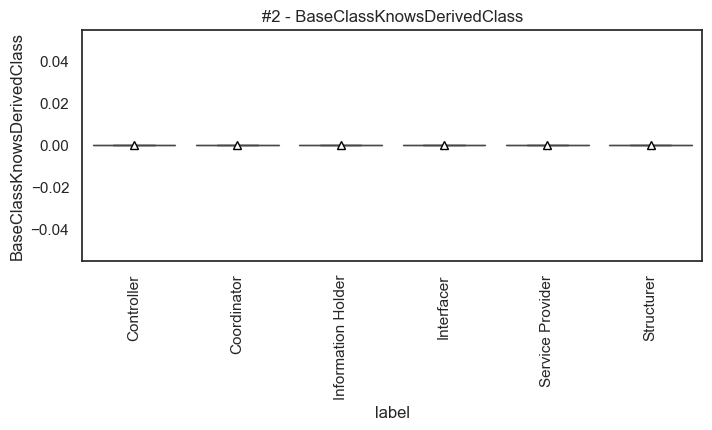

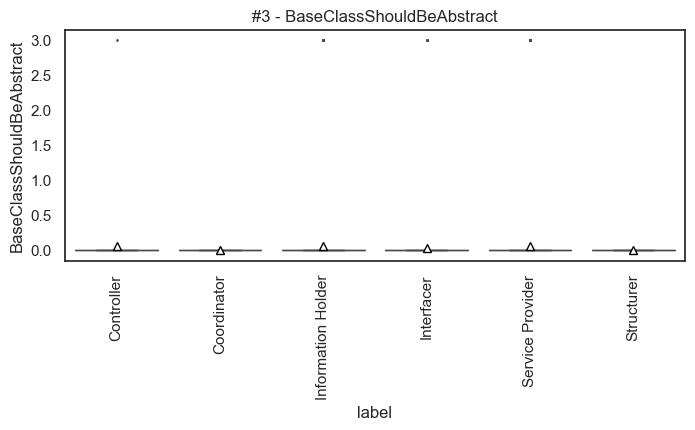

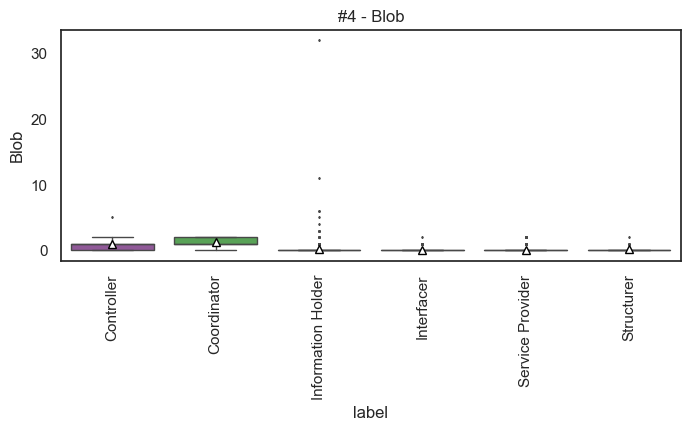

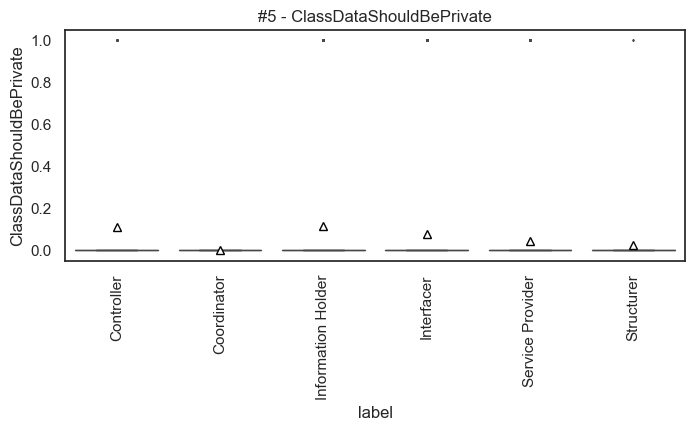

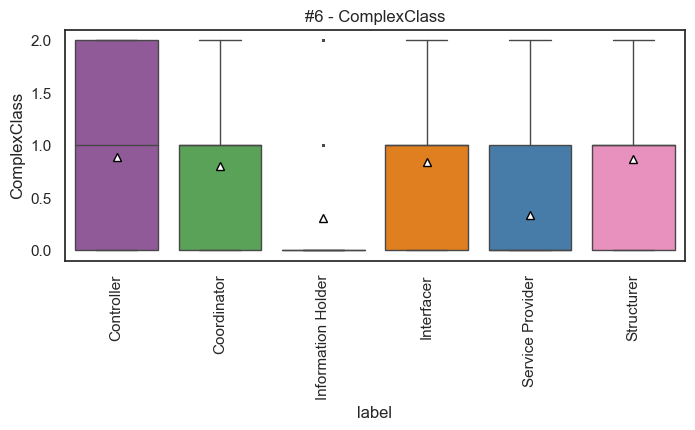

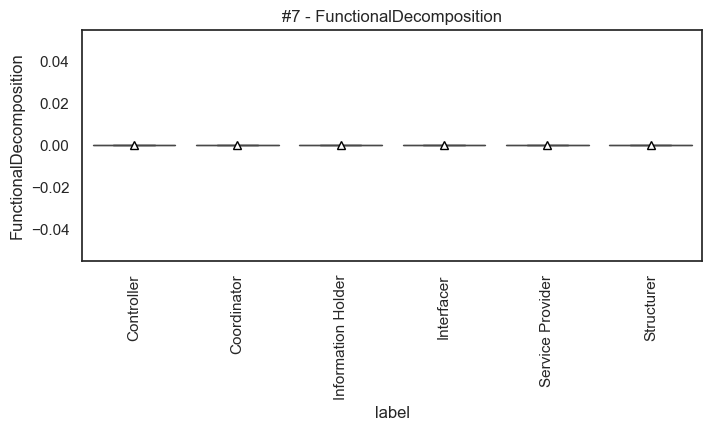

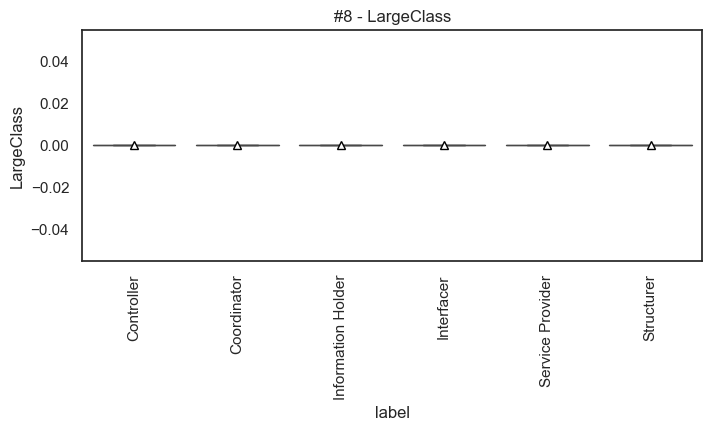

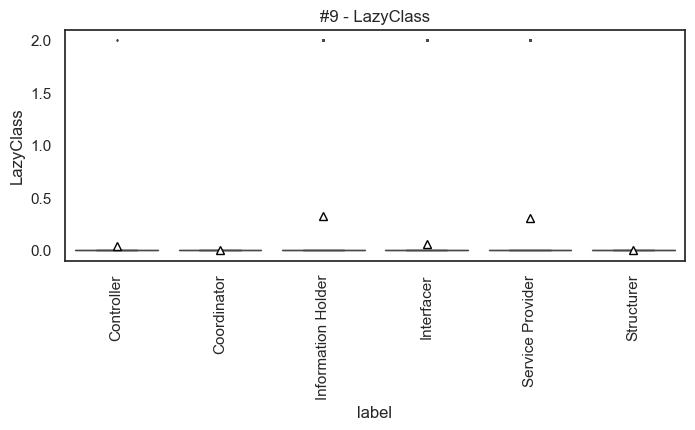

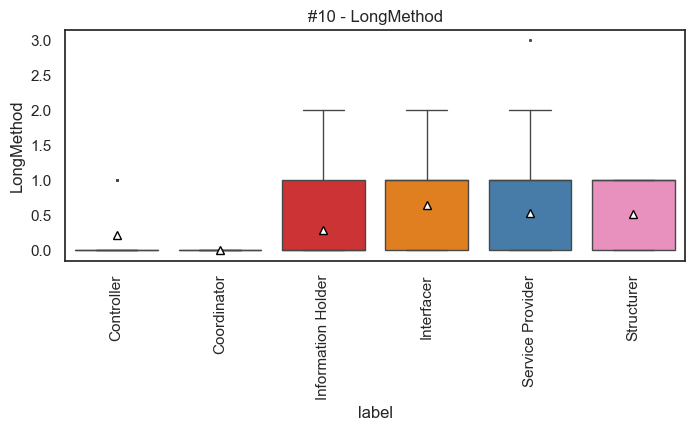

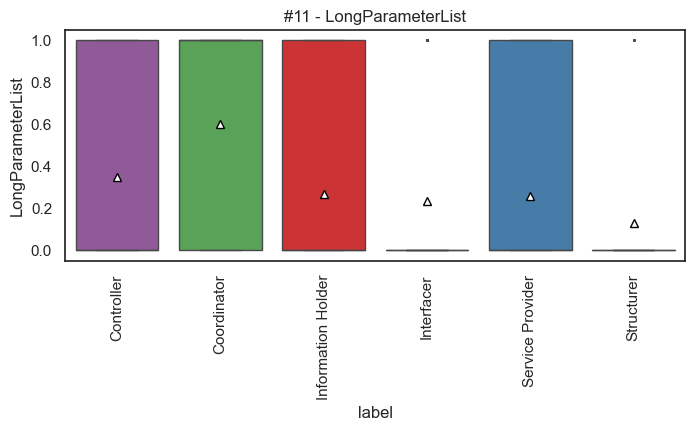

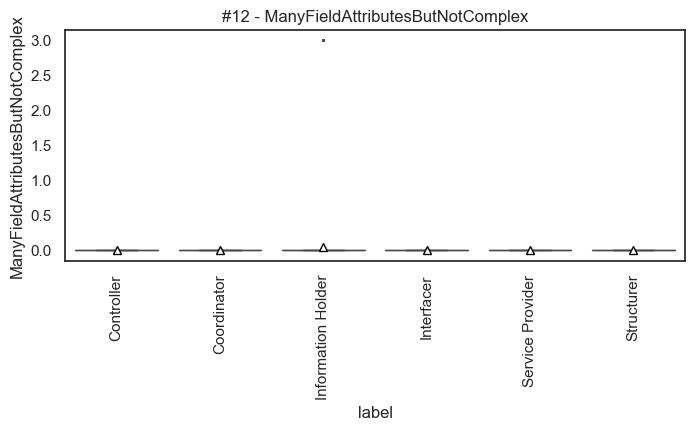

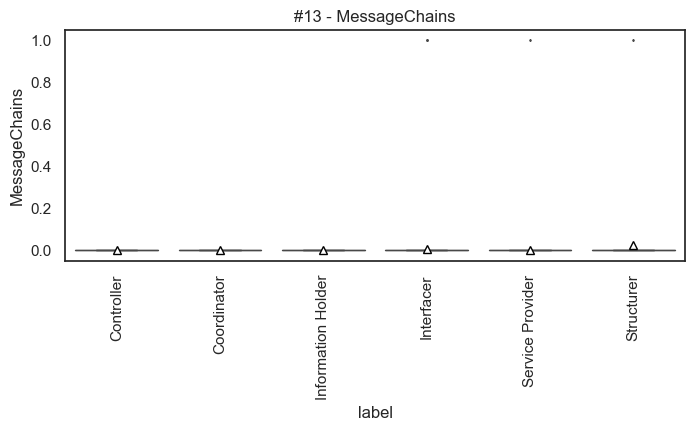

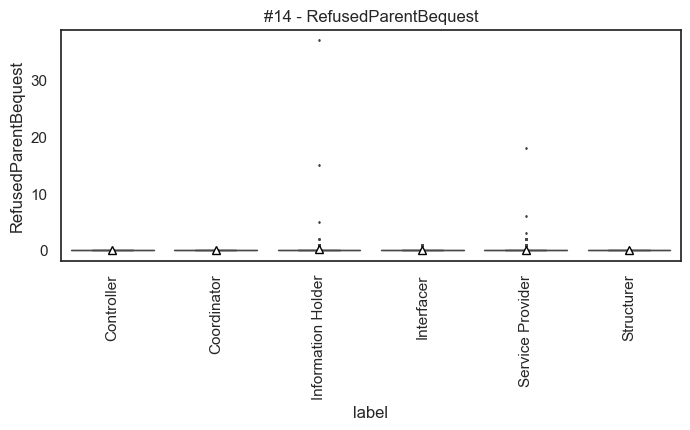

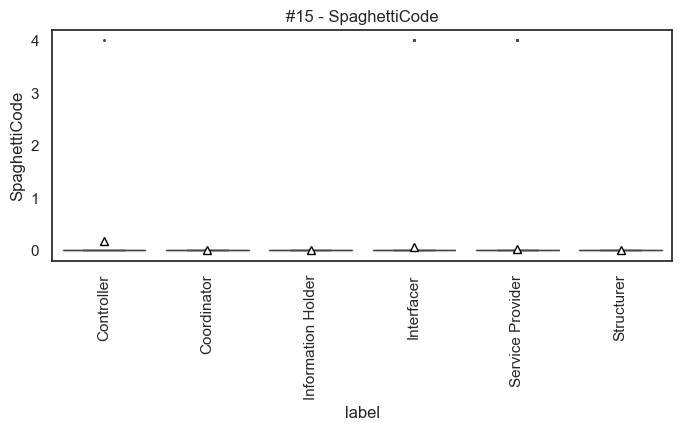

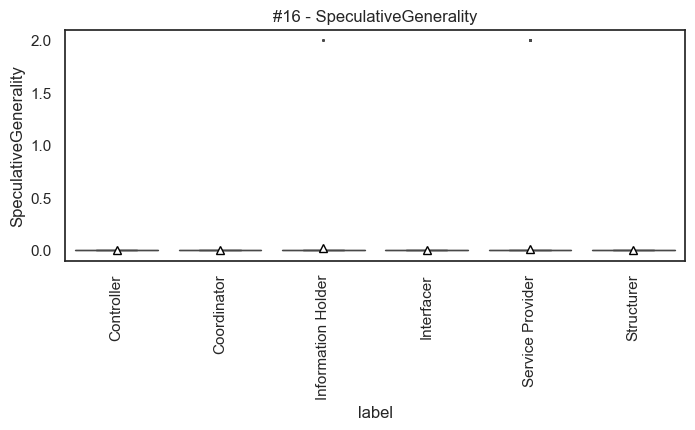

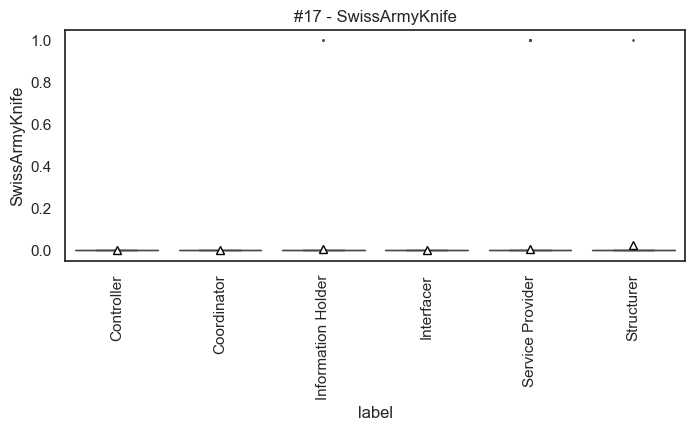

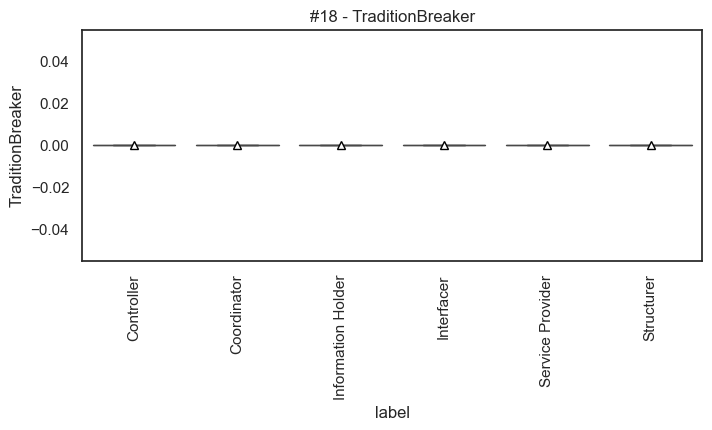

In [32]:
i = 0
for m in metrics:
    plt.figure(i, figsize=(8,3))

    g = sns.boxplot(x='label', y=m,
        palette=rs.dpalette(),
        order=rstr,
        linewidth=1, fliersize=1,
        showmeans=True,
        meanprops = {"markerfacecolor":"white", "markeredgecolor": "black"},
        data=df_merged)
    mn = df_merged[m].min() 
    mx = df_merged[m].max()
    # g.set(ylim=(mn,mx), title=f'#{i+1} - {m}')
    g.set(title=f'#{i+1} - {m}')

    plt.xticks(rotation = 90)
    plt.show()
    i += 1

[AntiSingleton]
A class that provides mutable class variables, which consequently could be used as global variables.


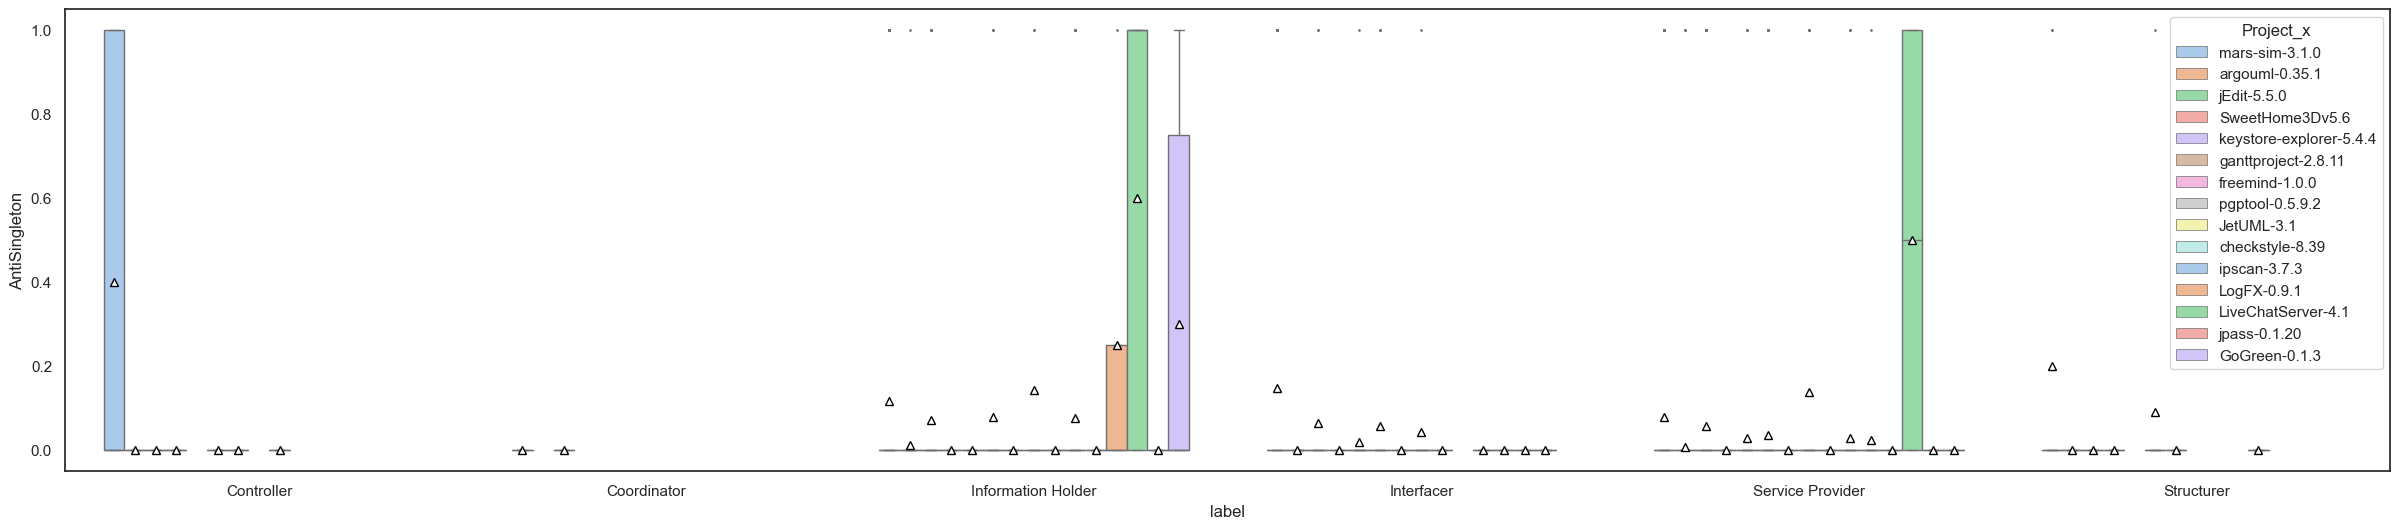

[BaseClassKnowsDerivedClass]
A class that has many subclasses without being abstract.


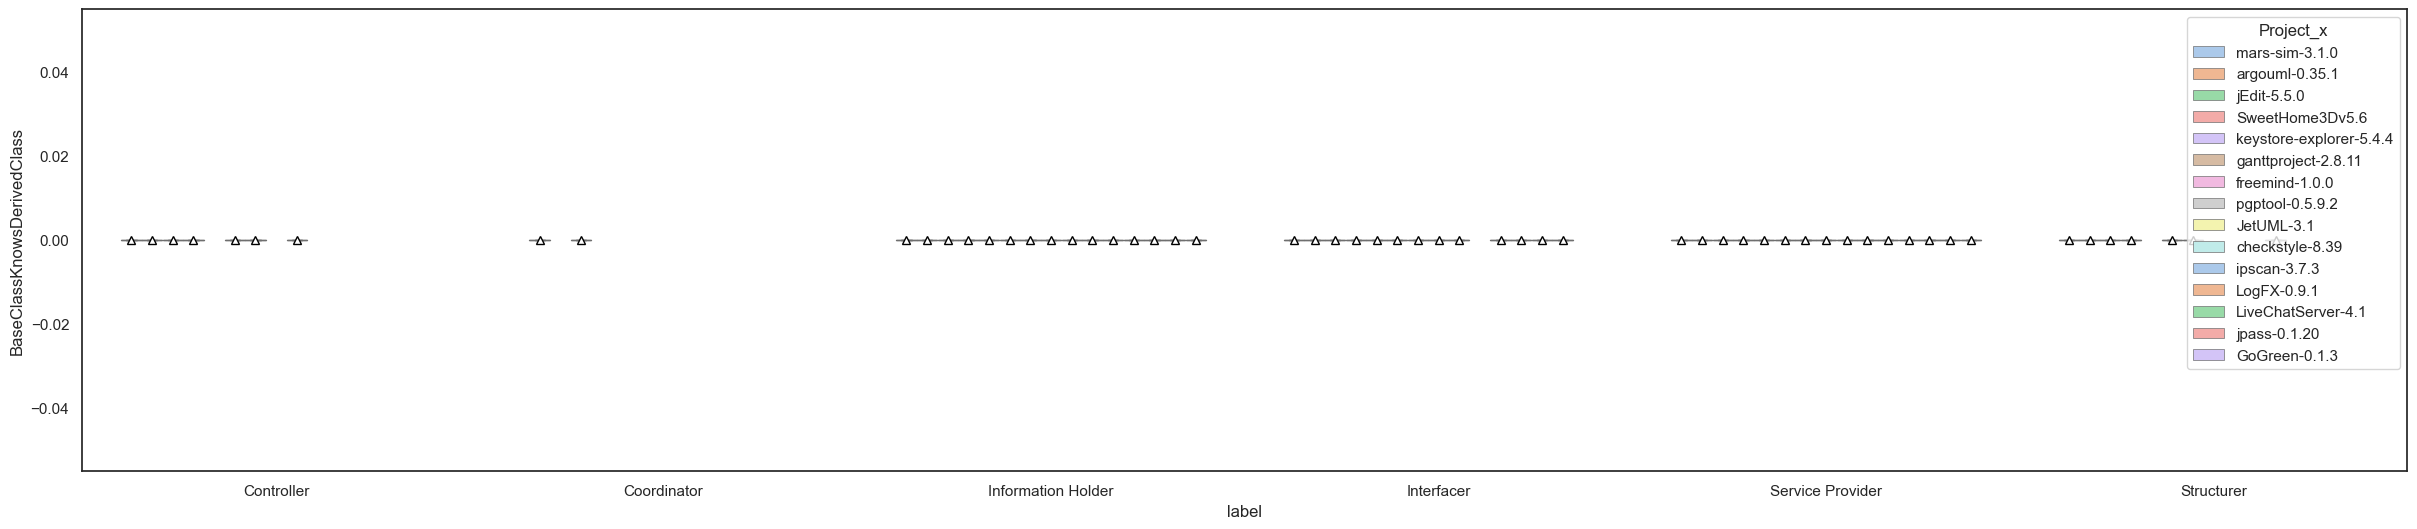

[BaseClassShouldBeAbstract]
A class that has many subclasses without being abstract.


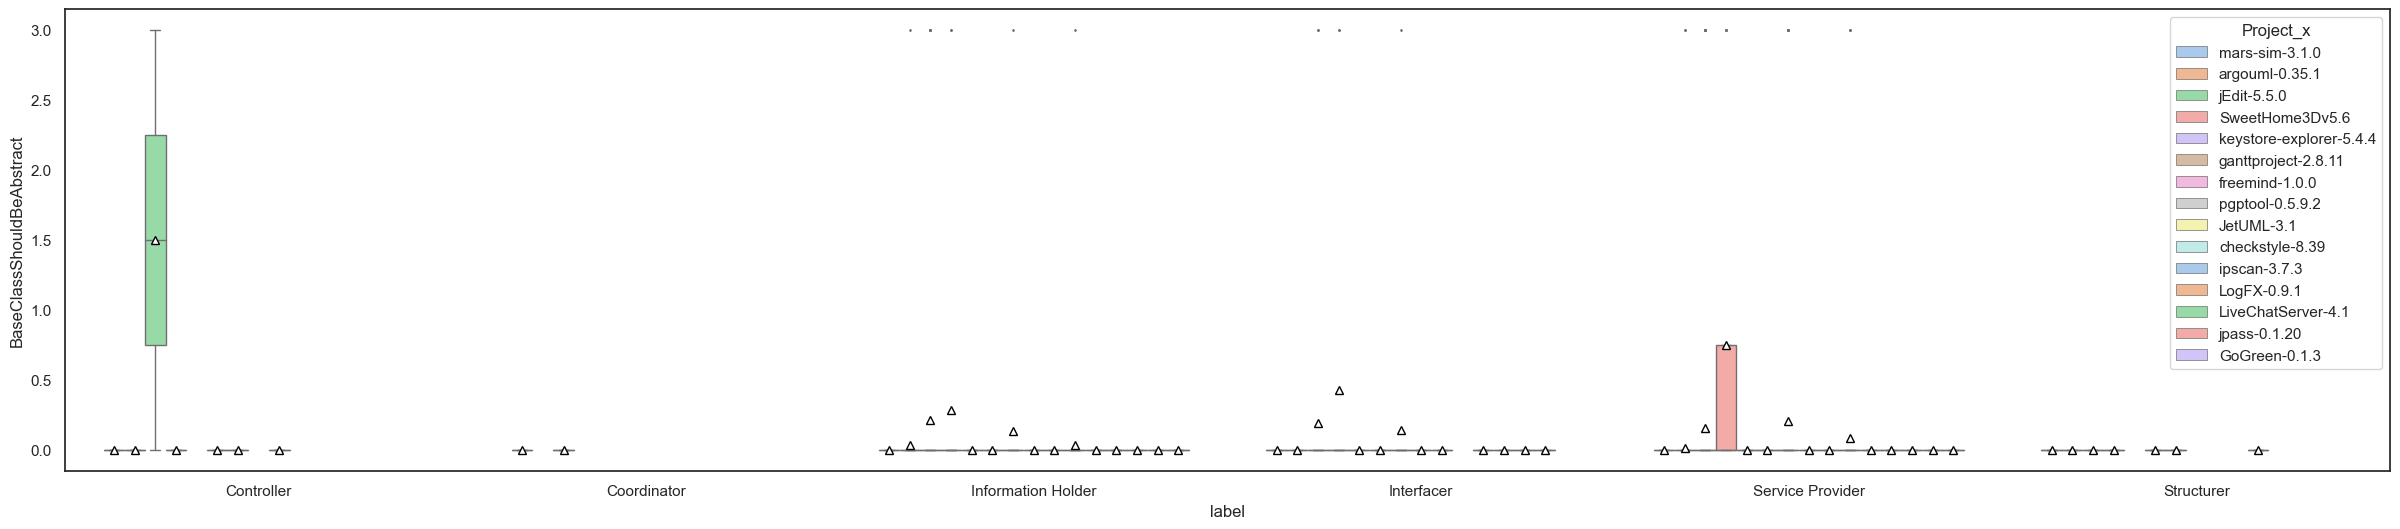

[Blob]
A large controller class that depends on data stored in surrounding data classes. A large class declares many fields and methods with a low cohesion.


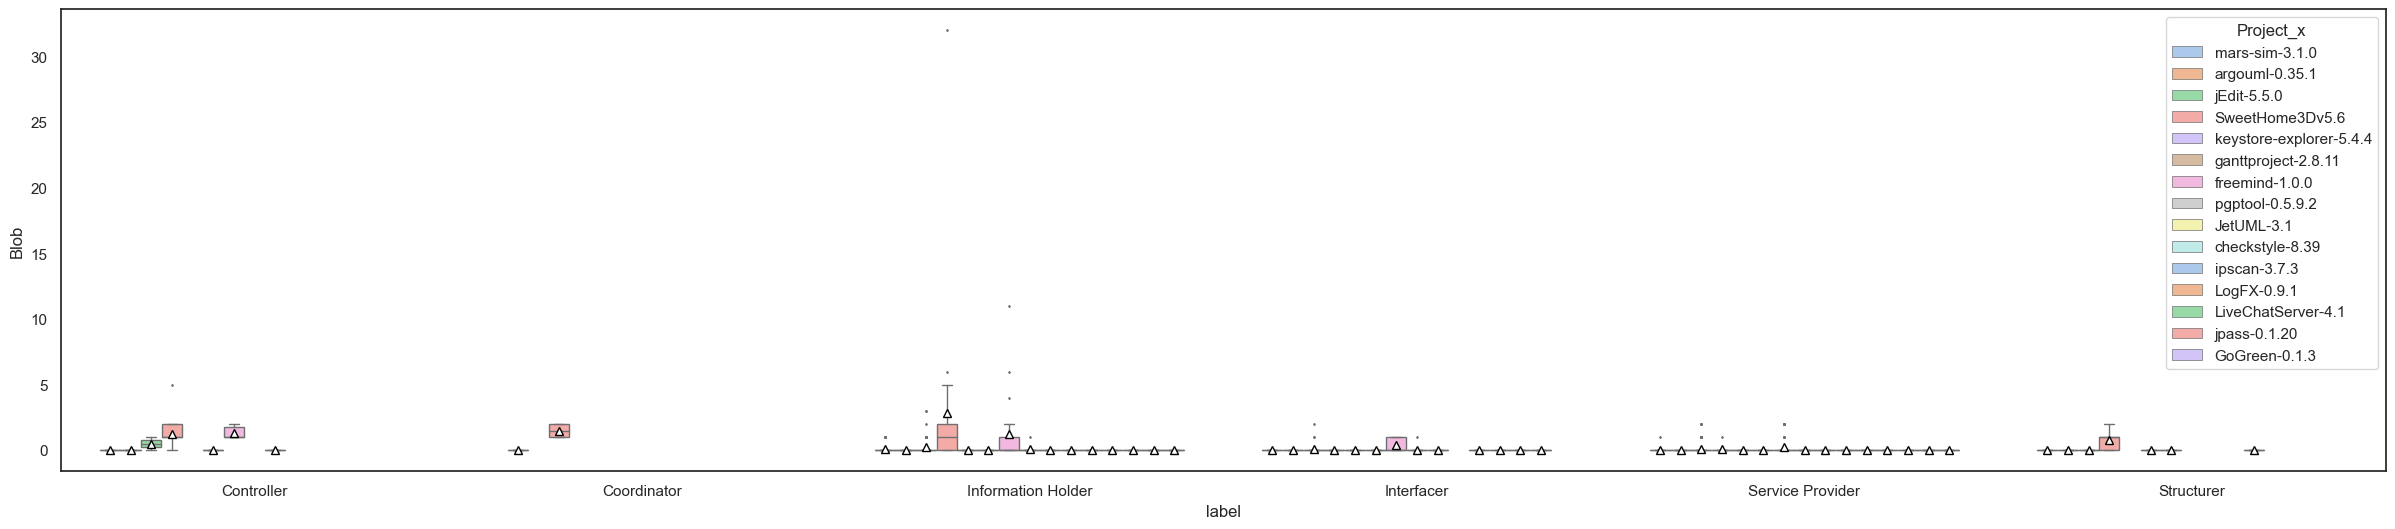

[ClassDataShouldBePrivate]
A class exposing its fields, violating the principle of data hiding.


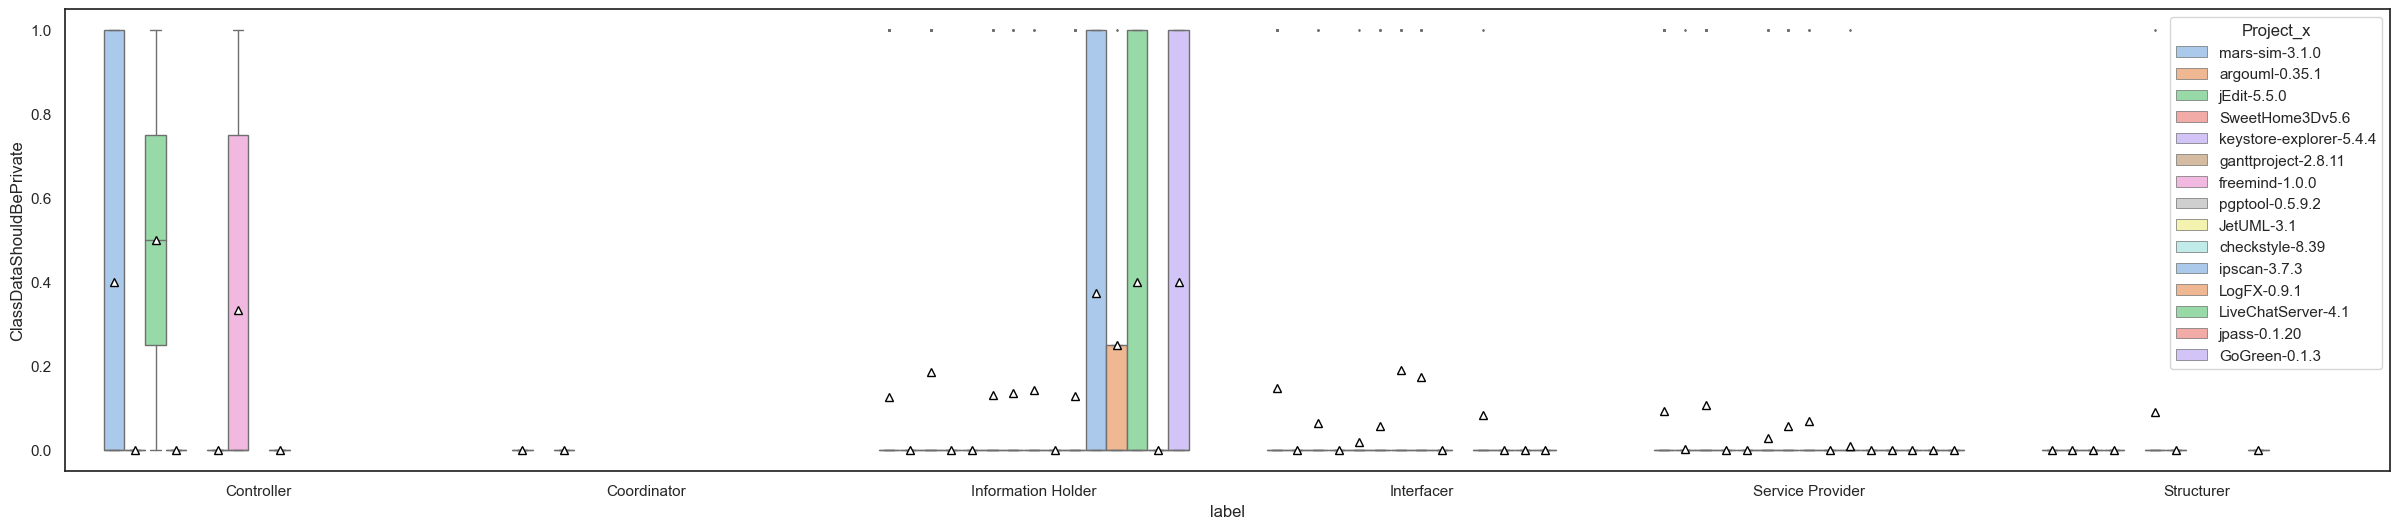

[ComplexClass]
A class having at least one method having a high cyclomatic complexity.


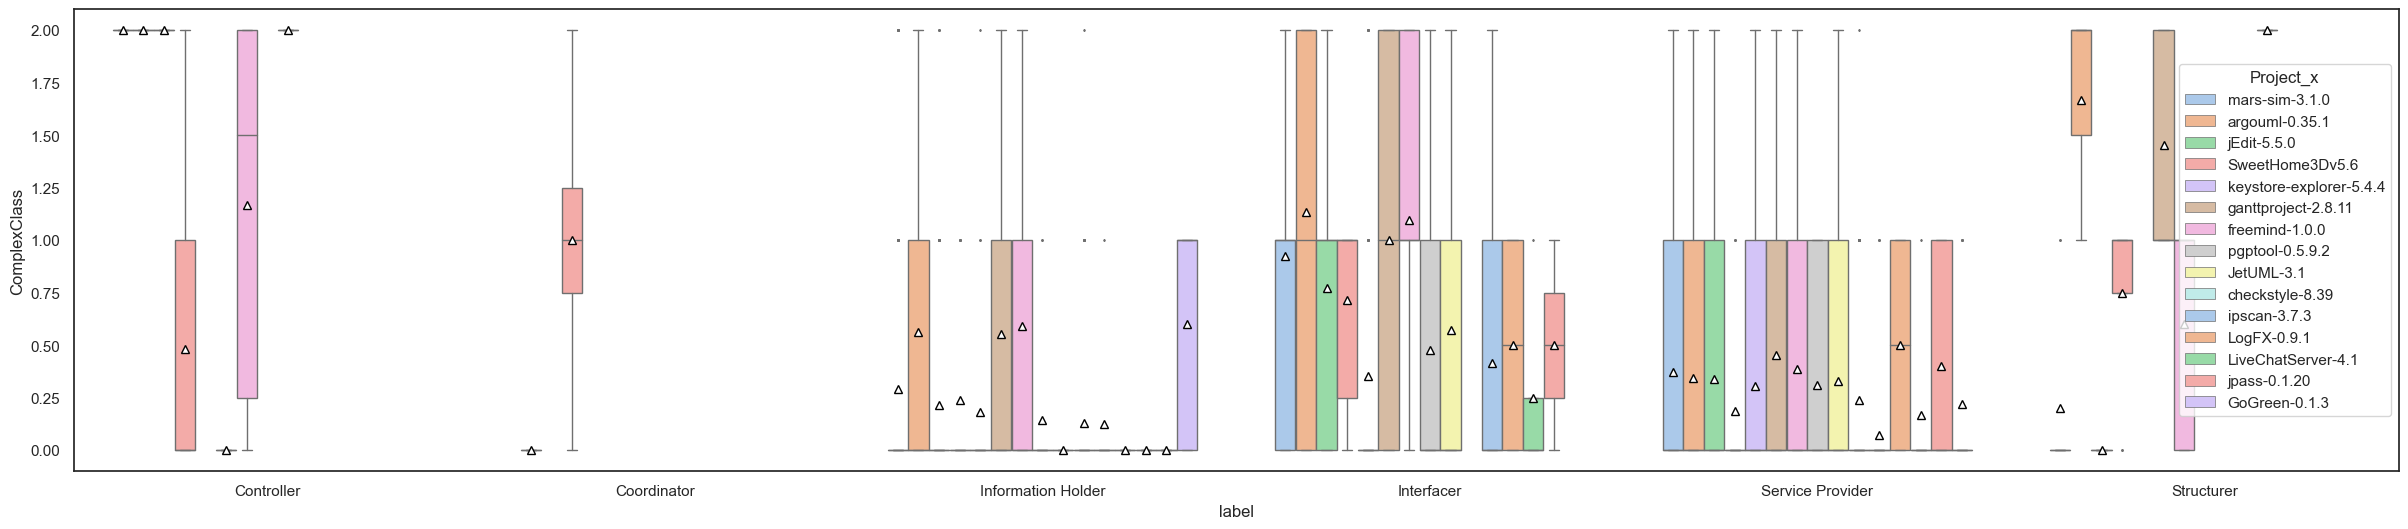

[FunctionalDecomposition]
A main class with a procedural name in which inheritance and polymorphism are scarcely used.


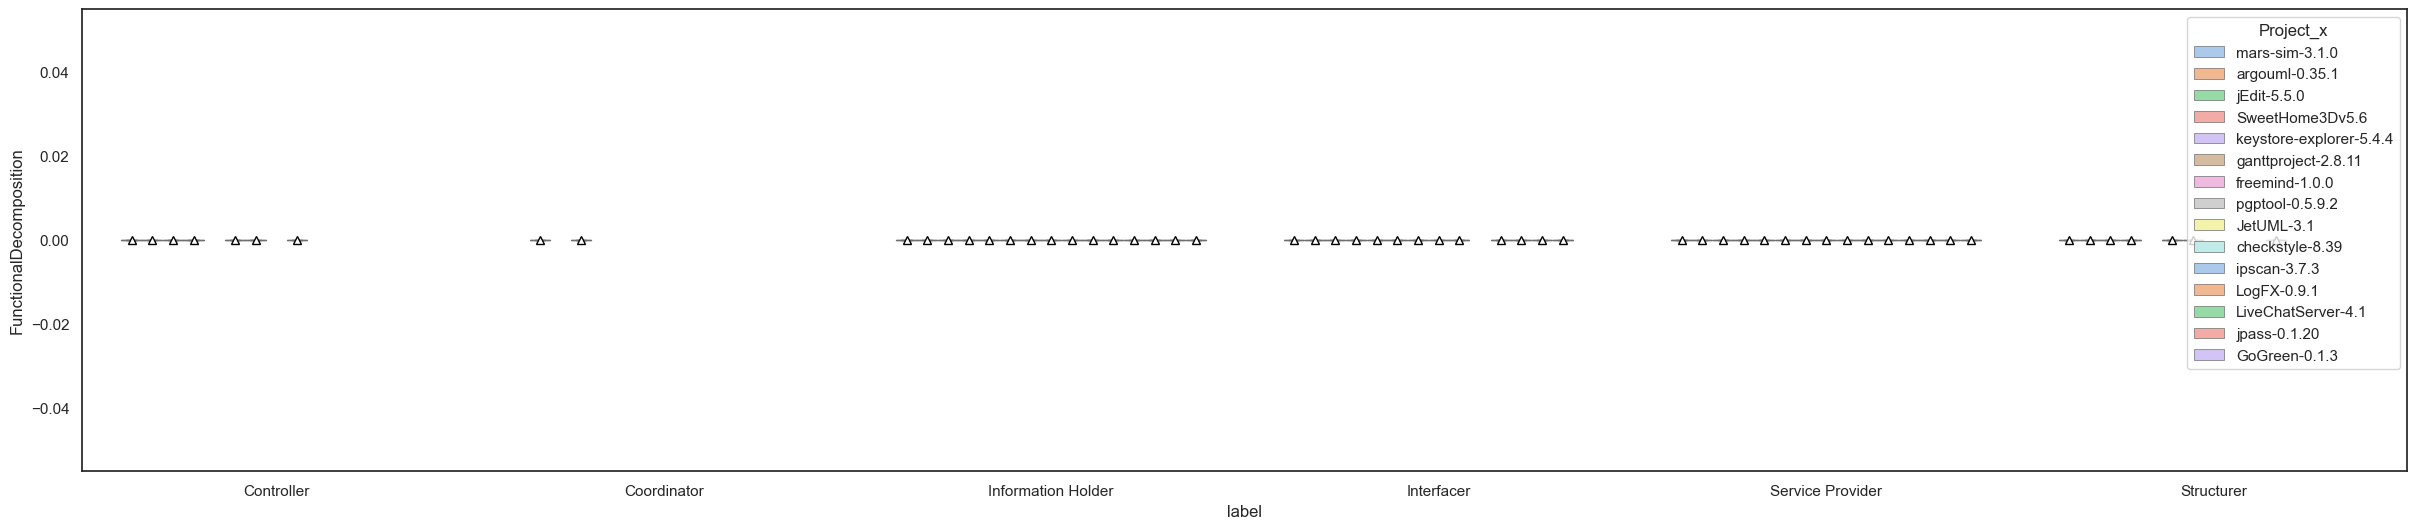

[LargeClass]
A class that has grown too large in term of Lines of Code.


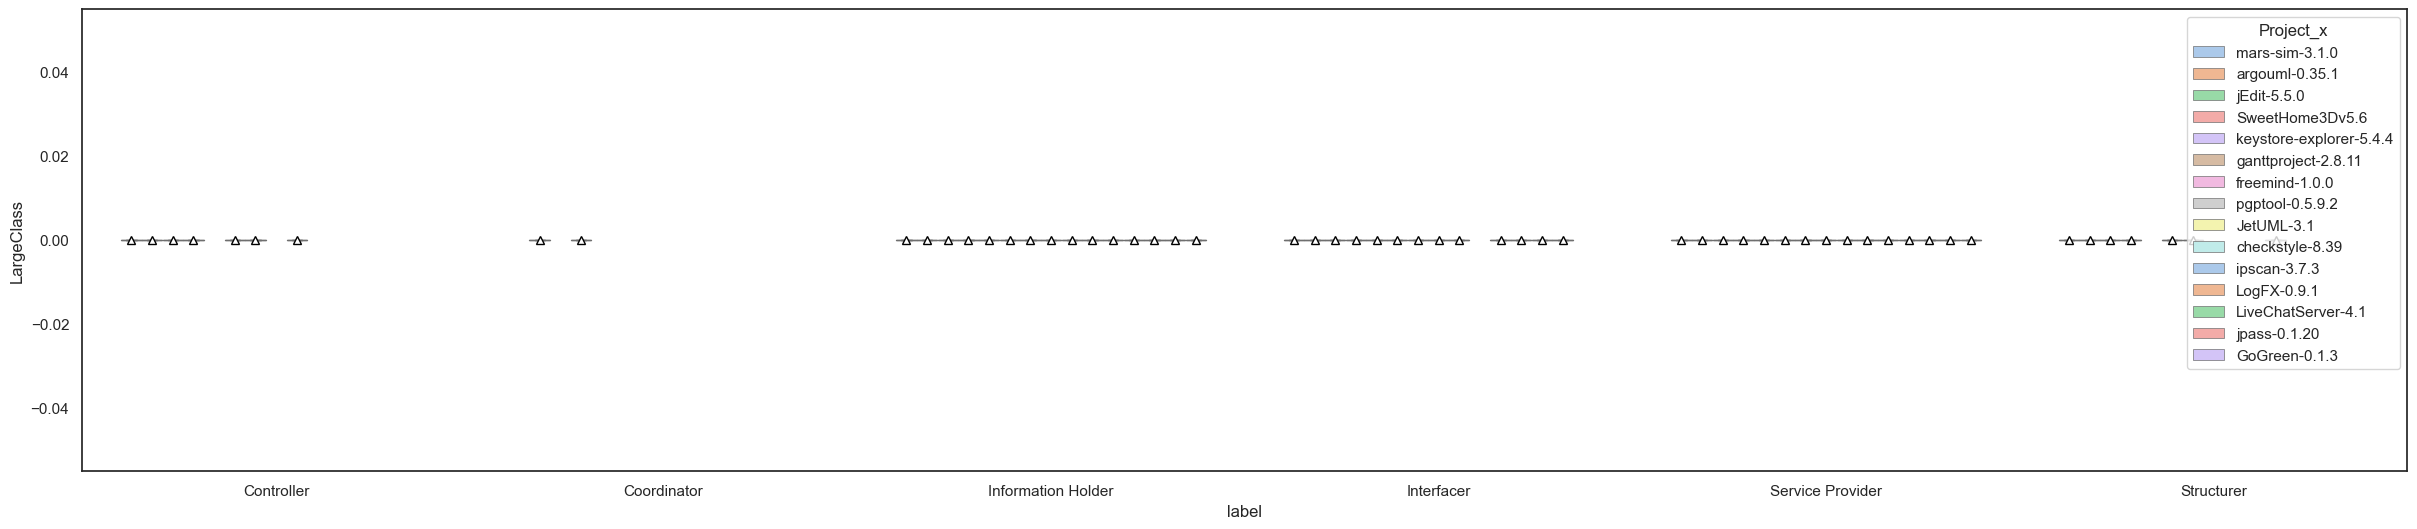

[LazyClass]
A class having very small dimension, few methods and low complexity.


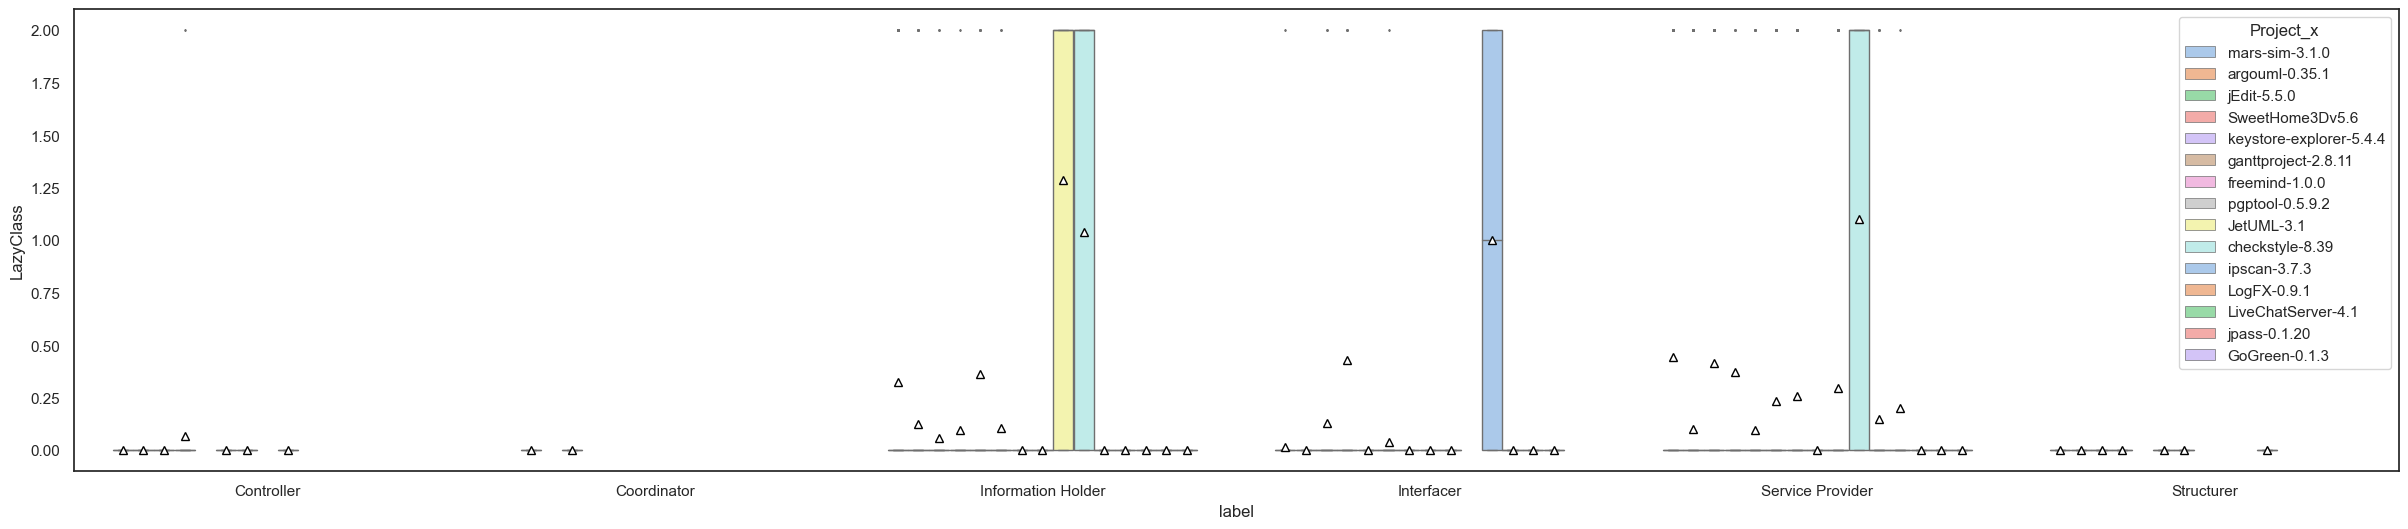

[LongMethod]
A method that is unduly long in terms of lines of code.


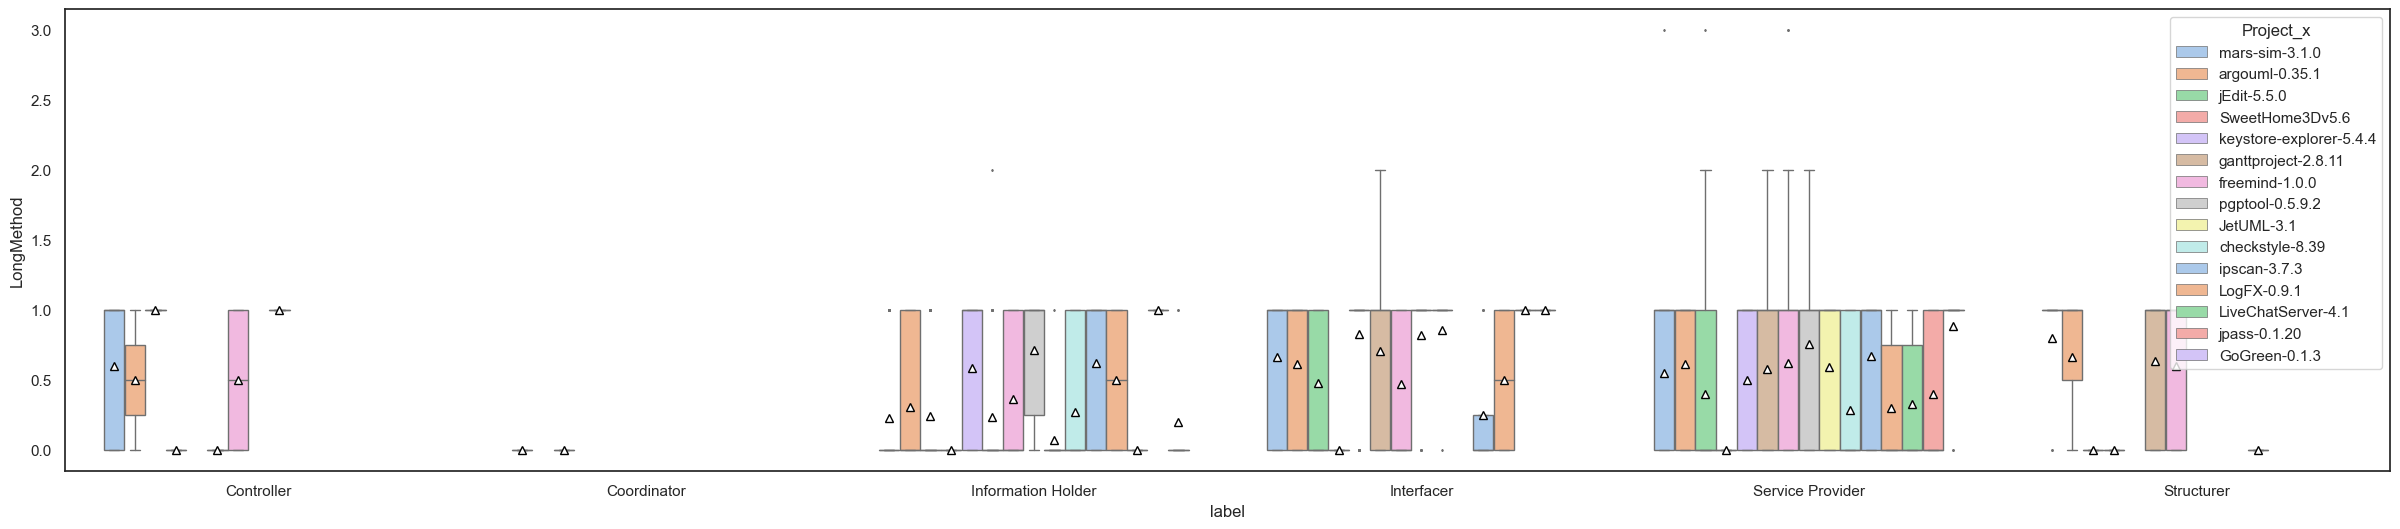

[LongParameterList]
A method having a long list of parameters, some of which avoidable.


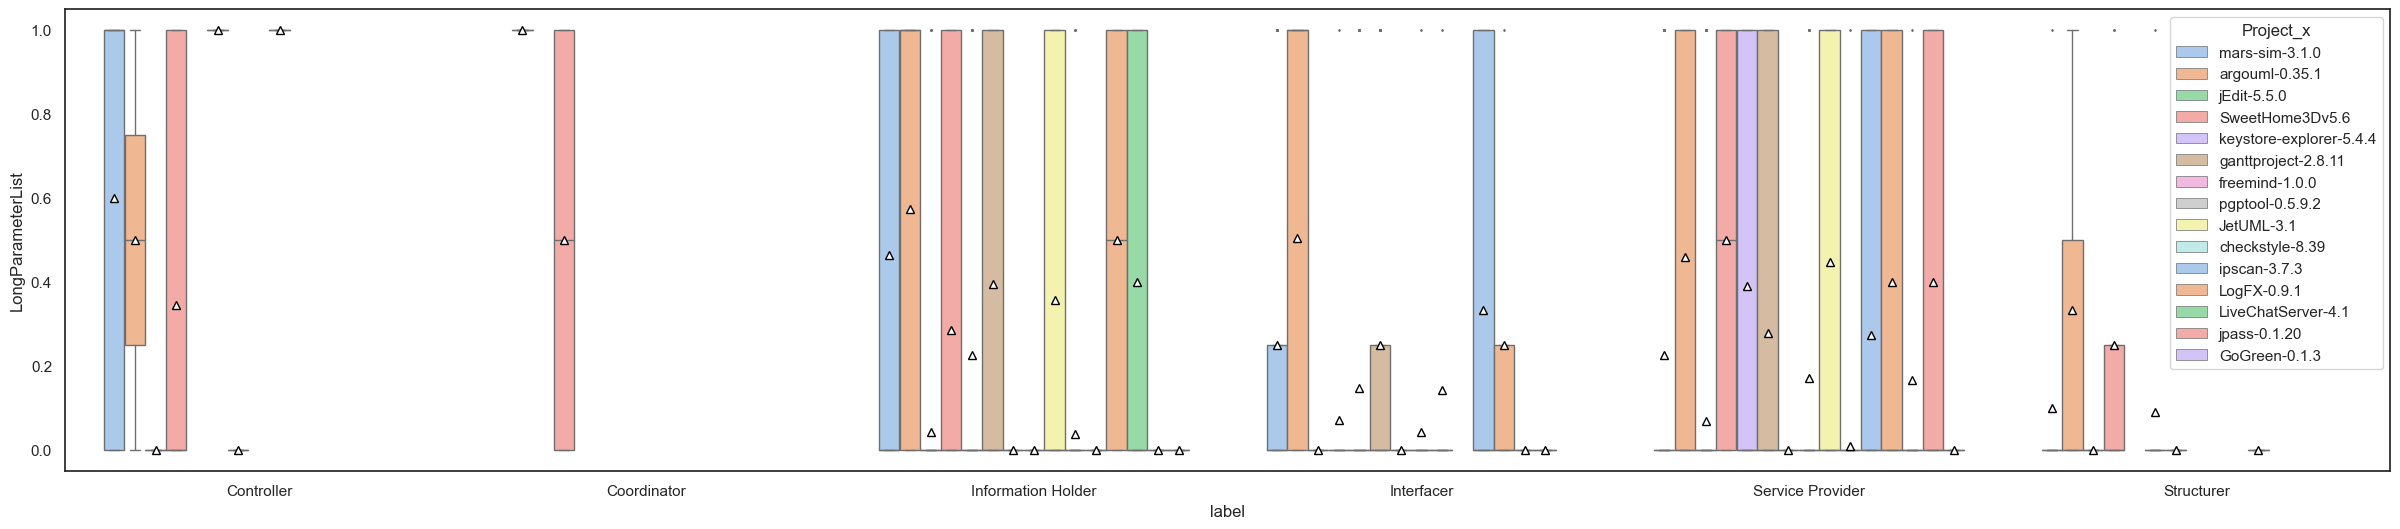

[ManyFieldAttributesButNotComplex]
A class that declares many attributes but which is not complex and, hence, more likely to be some kind of data class holding values without providing behaviour.


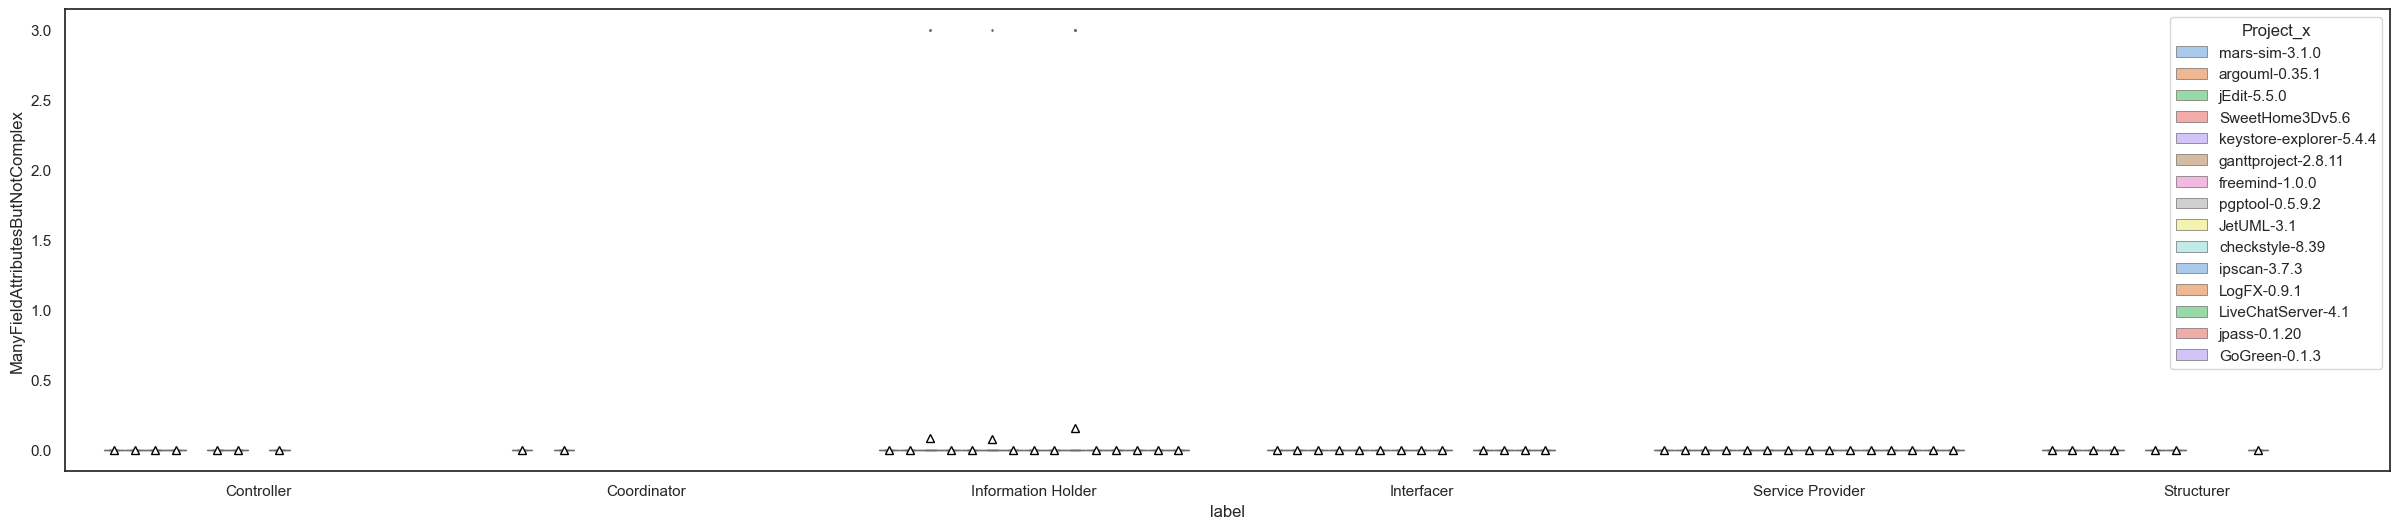

[MessageChains]
A long chain of method invocations performed to implement a class functionality.


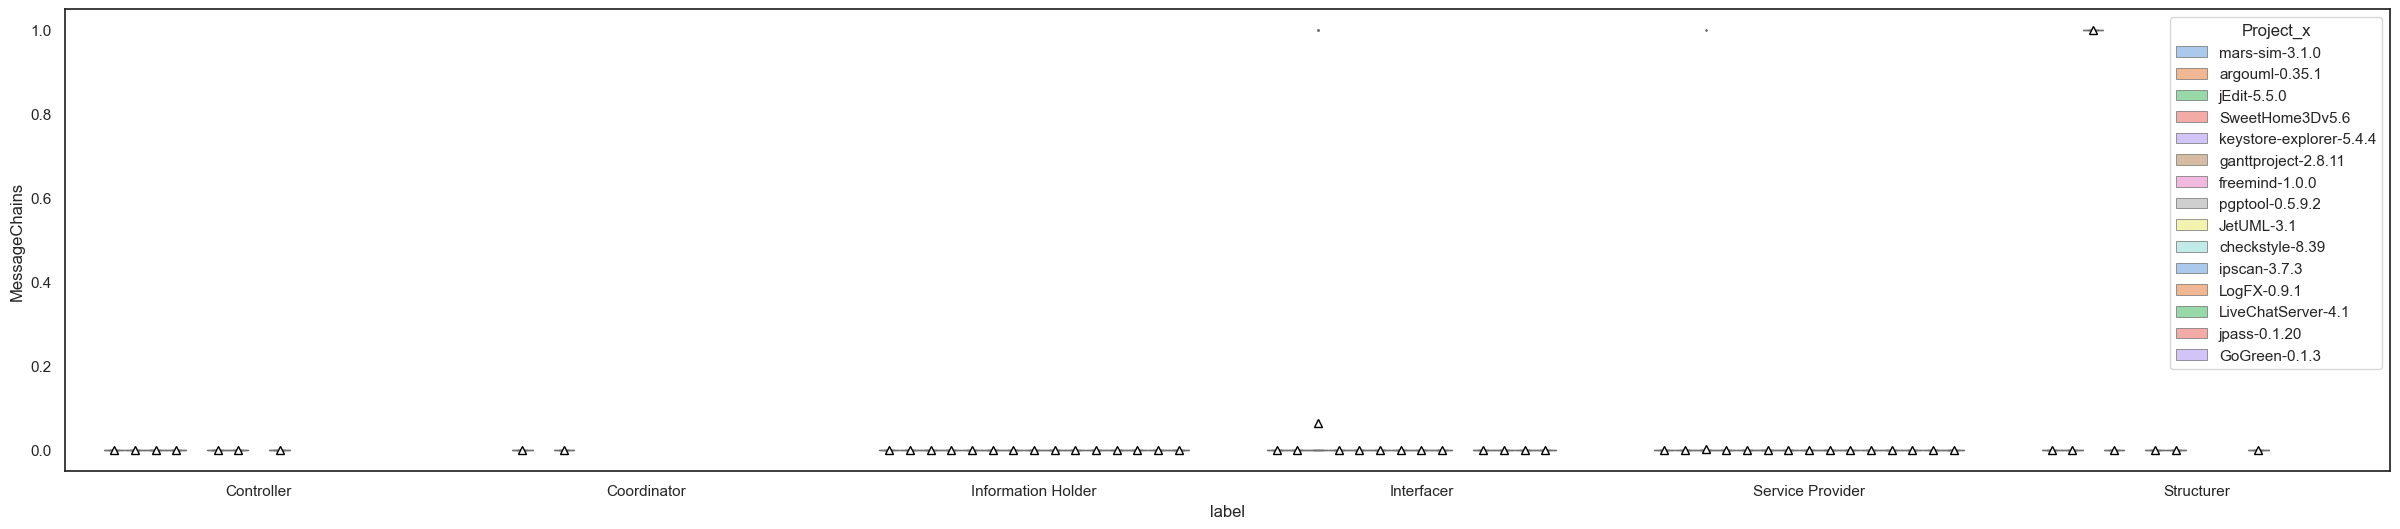

[RefusedParentBequest]
A class redefining most of the inherited methods, thus signaling a wrong hierarchy.


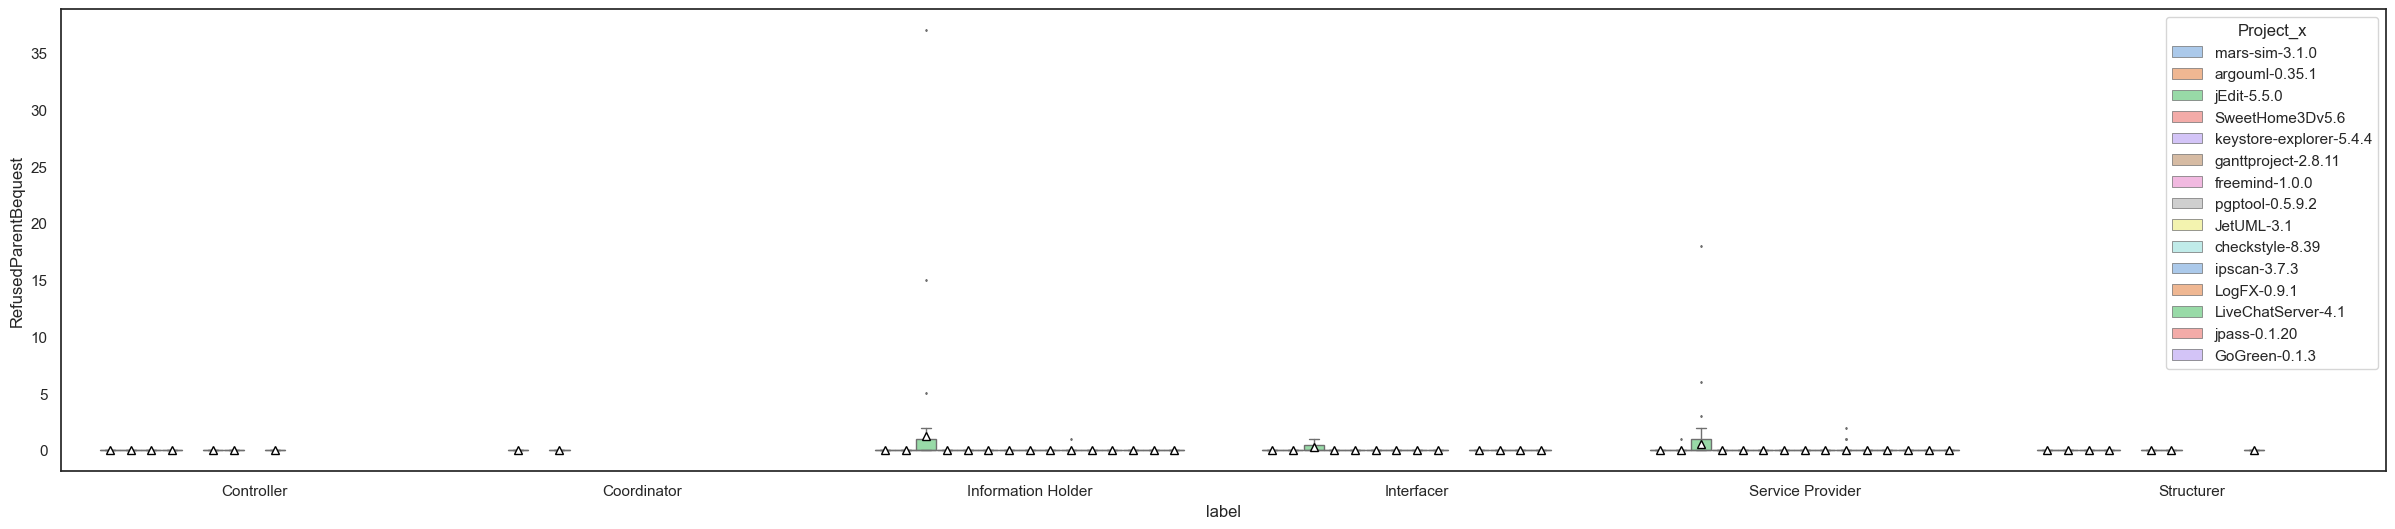

[SpaghettiCode]
A class implementing complex methods interacting between them, with no parameters, using global variables.


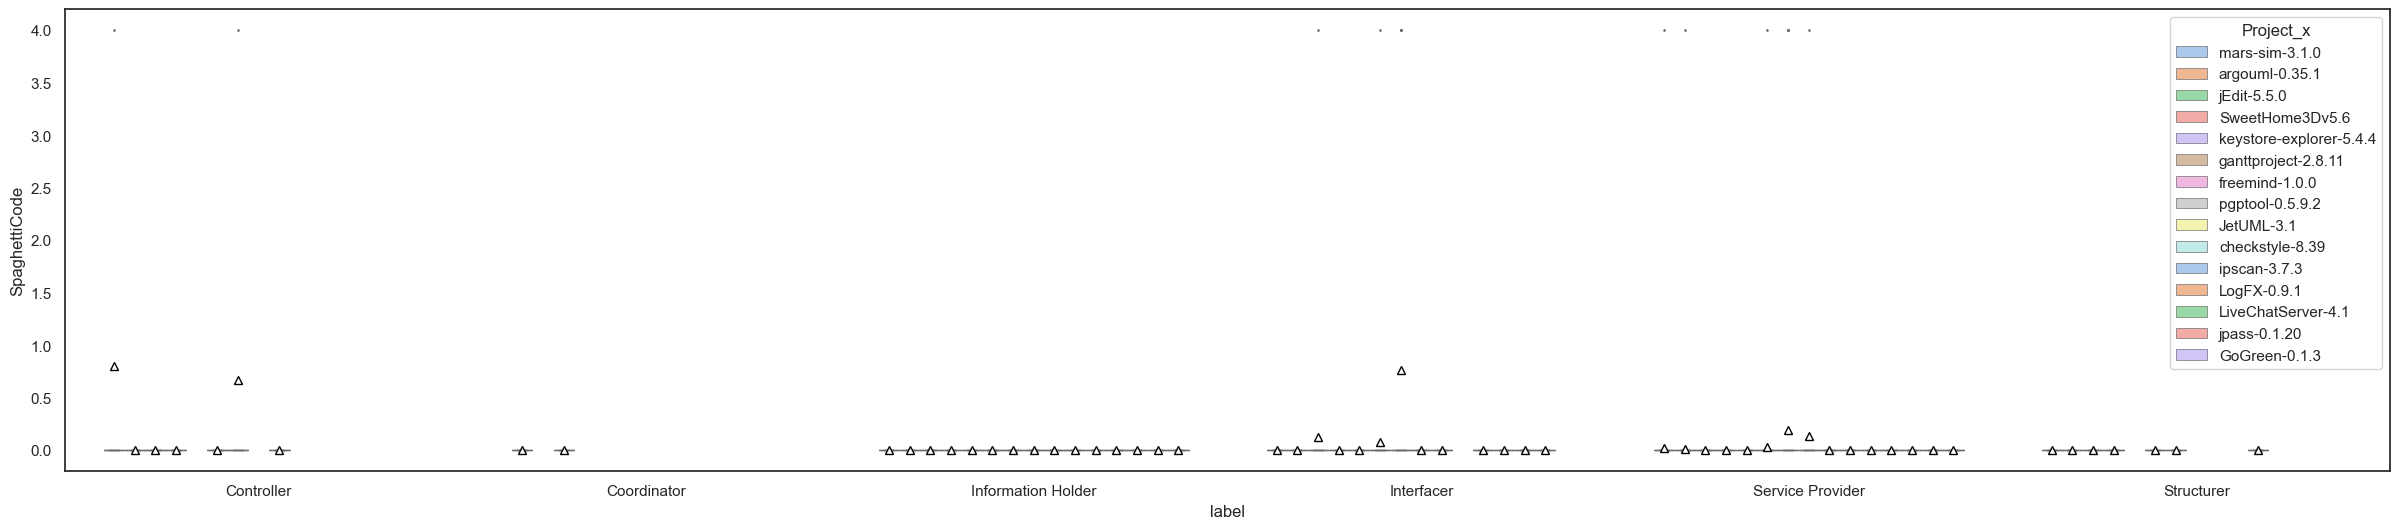

[SpeculativeGenerality]
A class declared as abstract having very few children classes using its methods.


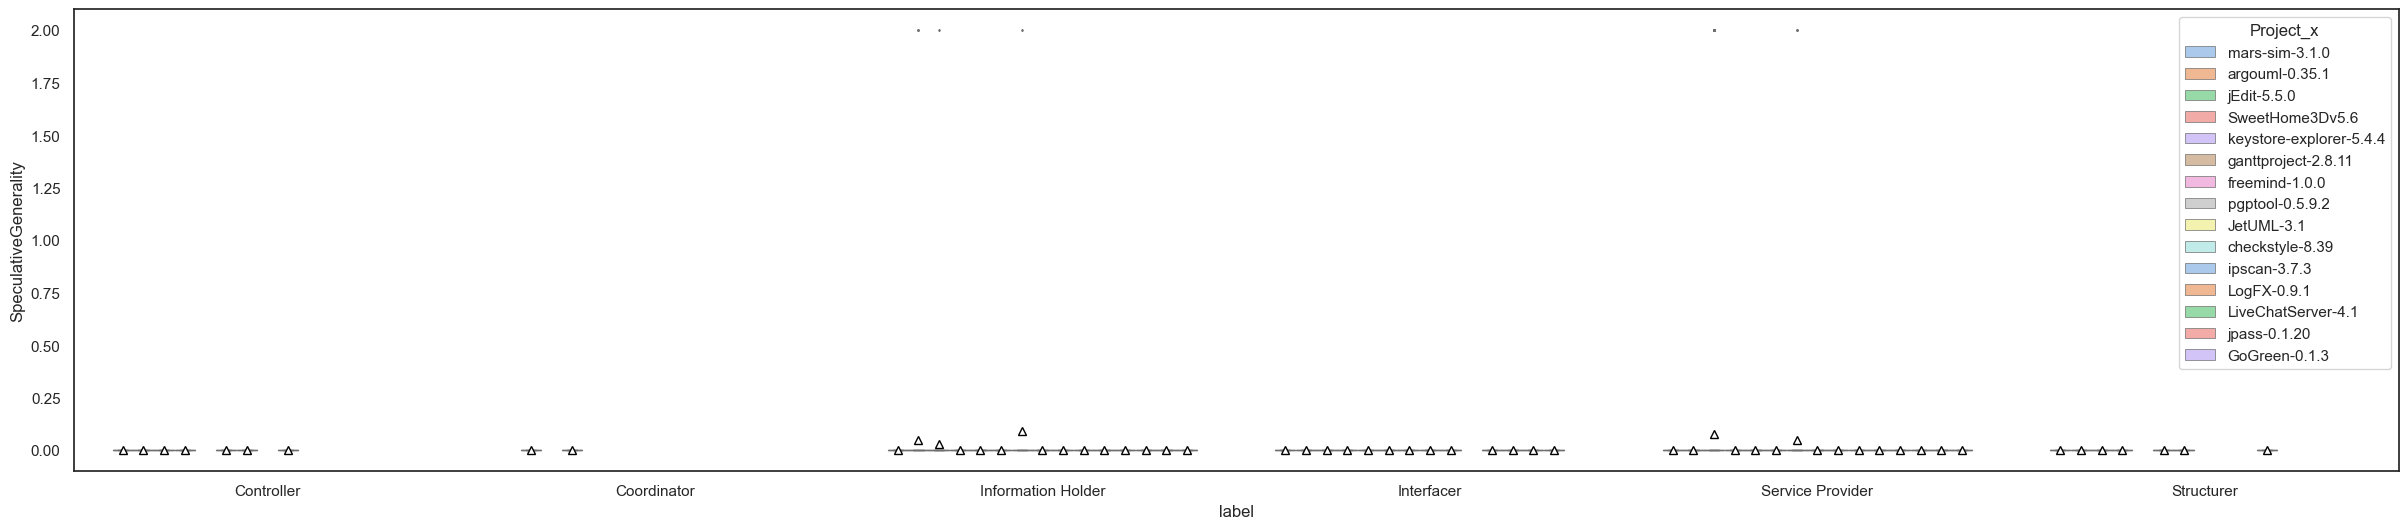

[SwissArmyKnife]
A complex class that offers a high number of services, for example, a complex class implementing a high number of interfaces.


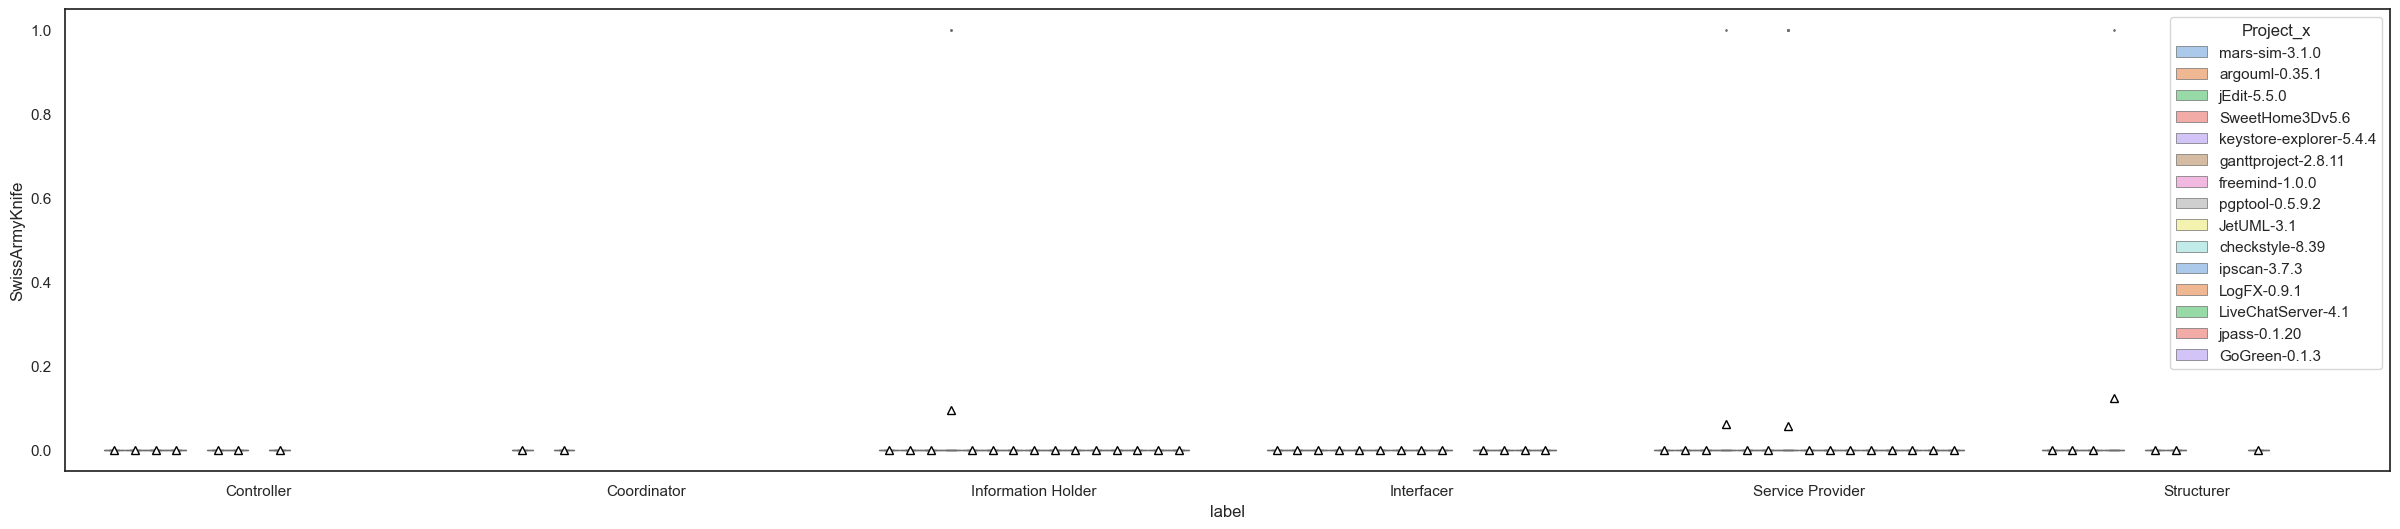

[TraditionBreaker]
A class that inherits from a large parent class but that provides little behaviour and without subclasses.


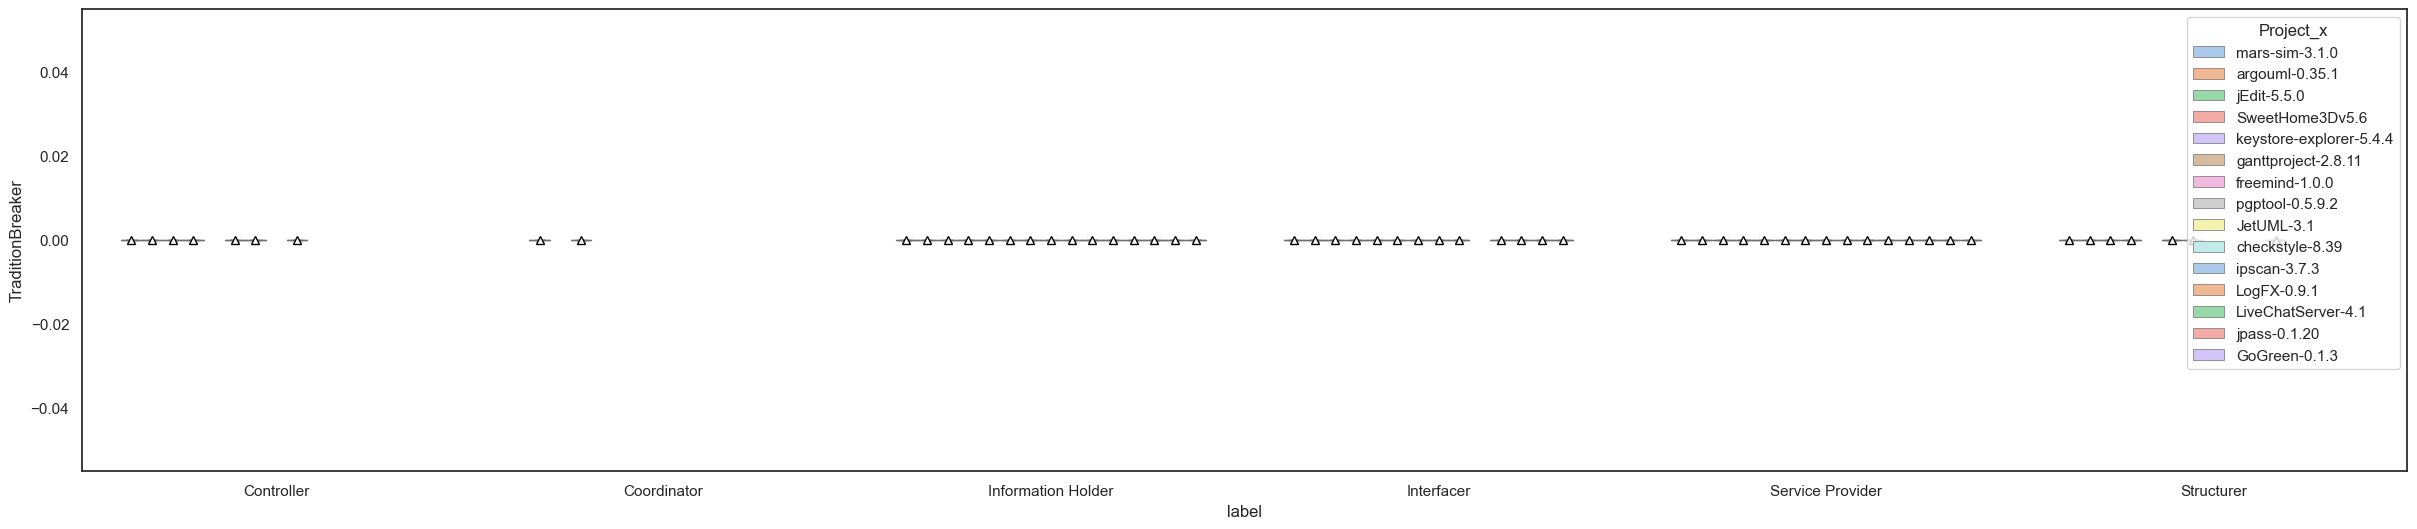

In [33]:
i = 0
for metric in metrics:
  plt.figure(i, figsize=(30,6))
  print(f"[{metric}]")
  if metric in metrics_def.keys():
    print(metrics_def[metric])
  g = sns.boxplot(x="label", y=metric,
      hue="Project_x",
      hue_order=prj_order,
      palette="pastel", 
      order=rstr,
      linewidth=1, fliersize=1,
      showmeans=True,
      meanprops = {"markerfacecolor":"white", "markeredgecolor": "black"},
      data=df_merged)
  mn = df_merged[metric].min()
  mx = df_merged.quantile(.98, interpolation="higher")[metric]
  # g.set(ylim=(mn,mx))
  plt.show()
  i += 1